In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


In [15]:
import warnings

warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('Dry_Bean_Dataset.csv')
encoder = LabelEncoder()
df['Class'] = encoder.fit_transform(df['Class'])
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


In [17]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

Text(0, 0.5, 'Inertia')

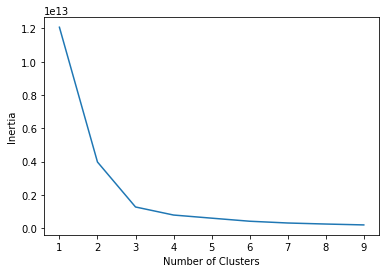

In [18]:
points = df.iloc[:, 1:14].values
x = points[:, 0]
y = points[:, 1]
inertias = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)
plt.plot(range(1, 10), inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

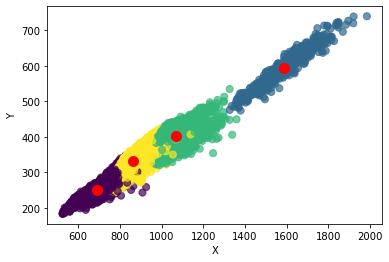

In [19]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)
plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

In [20]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(points)
df['Cluster'] = kmeans.predict(points)
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,Cluster
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5,0


In [22]:
results = pd.DataFrame(columns = ['Cluster', 'Average Area', 'Average Perimeter', 'Average roundness', 'Average Compactness',
                                  'No. of SEKER', 'No. of BARBUNYA', 'No. of BOMBAY', 'No. of CALI',
                                  'No. of HOROZ', 'No. of SIRA', 'No. of DERMASON'])
for i in range(len(kmeans.cluster_centers_)):
    area = df[df['Cluster'] == i]['Area'].mean()
    perimeter = df[df['Cluster'] == i]['Perimeter'].mean()
    roundness = df[df['Cluster'] == i]['roundness'].mean()
    compactness = df[df['Cluster'] == i]['Compactness'].mean()
    gdf = df[df['Cluster'] == i]
    SEKER = gdf[gdf['Class'] == 5].shape[0]
    BARBUNYA = gdf[gdf['Class'] == 0].shape[0]
    BOMBAY = gdf[gdf['Class'] == 1].shape[0]
    CALI = gdf[gdf['Class'] == 2].shape[0]
    HOROZ = gdf[gdf['Class'] == 4].shape[0]
    SIRA = gdf[gdf['Class'] == 6].shape[0]
    DERMASON = gdf[gdf['Class'] == 3].shape[0]
    results.loc[i] = ([i, area, perimeter, roundness, compactness, SEKER, BARBUNYA, BOMBAY, CALI, HOROZ, SIRA, DERMASON])
results.head()

,Cluster,Average Area,Average Perimeter,Average roundness,Average Compactness,No. of SEKER,No. of BARBUNYA,No. of BOMBAY,No. of CALI,No. of HOROZ,No. of SIRA,No. of DERMASON
0,0.0,34759.875454,690.084493,0.913375,0.835969,1517.0,2.0,0.0,0.0,137.0,860.0,3546.0
1,1.0,173708.005769,1586.822840,0.864298,0.792304,0.0,0.0,520.0,0.0,0.0,0.0,0.0
2,2.0,74879.485610,1069.011704,0.822366,0.769356,0.0,1014.0,2.0,1521.0,207.0,1.0,0.0
3,3.0,50292.596872,863.302043,0.850264,0.769239,510.0,306.0,0.0,109.0,1584.0,1775.0,0.0
